In [91]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import pandas as pd
from mrmr import mrmr_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r'alexis.csv')

In [3]:
df

,Unnamed: 0,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,0,250.566814,3.0,1,1,0,10.0,99.0,1,1.732893,...,0,0,0,0,0,0,0,0,0,1
1,1,156.604259,3.0,0,0,0,10.0,97.0,1,4.807912,...,0,0,0,0,0,0,0,0,0,1
2,2,283.056354,5.0,1,0,1,10.0,95.0,2,2.811773,...,0,0,0,0,0,0,0,0,0,1
3,3,301.755370,4.0,1,0,1,10.0,94.0,2,3.240595,...,0,0,0,0,0,0,0,0,0,1
4,4,150.760816,2.0,1,0,1,10.0,96.0,1,2.241146,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50937,50937,327.460609,2.0,1,0,0,9.0,96.0,1,2.608873,...,0,0,1,0,0,0,0,0,0,0
50938,50938,242.977169,2.0,0,0,0,9.0,80.0,0,1.859134,...,0,0,1,0,0,0,0,0,0,0
50939,50939,138.943841,2.0,0,0,0,10.0,96.0,2,2.670450,...,0,0,1,0,0,0,0,0,0,0
50940,50940,185.258454,2.0,0,0,0,2.0,60.0,1,2.266090,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
df['host_is_superhost'].value_counts()

0    37927
1    13015
Name: host_is_superhost, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn import metrics

In [35]:
X = df.drop('host_is_superhost', axis=1)
y = df['host_is_superhost']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [45]:
to_keep = mrmr_classif(X_train, y_train.values, K=20)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.97it/s]


In [47]:
to_keep

['guest_satisfaction_overall',
 'realSum',
 'cleanliness_rating',
 'multi',
 'city_athens',
 'city_london',
 'city_paris',
 'city_budapest',
 'biz',
 'attr_index_norm',
 'city_rome',
 'room_type_Entire home/apt',
 'room_type_Shared room',
 'dist',
 'city_barcelona',
 'room_type_Private room',
 'city_lisbon',
 'person_capacity',
 'rest_index',
 'weekend']

## ME SCALED DATA MRMR

In [46]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#MR-MR method chooses the most significant columns
selected_cols = mrmr_classif(pd.DataFrame(X_train_sc, columns = X.columns), y_train.values, K=25)
selected_cols

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  6.11it/s]


['guest_satisfaction_overall',
 'realSum',
 'cleanliness_rating',
 'multi',
 'city_athens',
 'city_london',
 'city_paris',
 'city_budapest',
 'biz',
 'attr_index_norm',
 'city_rome',
 'room_type_Entire home/apt',
 'room_type_Shared room',
 'dist',
 'city_barcelona',
 'room_type_Private room',
 'city_lisbon',
 'person_capacity',
 'rest_index',
 'weekend',
 'bedrooms',
 'attr_index',
 'city_vienna',
 'rest_index_norm',
 'city_amsterdam']

In [57]:
X_mrmr = X[selected_cols]

X_train, X_test, y_train, y_test = train_test_split(X_mrmr,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)



In [58]:
sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [68]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_sm)
X_test_sc = scaler.transform(X_test)

## X_train_sc -- y_sm -- X_test_sc -- y_test

In [65]:
from sklearn.metrics import classification_report

## Random Forest

In [66]:
rf = RandomForestClassifier(random_state = 42)

In [69]:
rf.fit(X_train_sc, y_sm)

RandomForestClassifier(random_state=42)

In [73]:
preds = rf.predict(X_test_sc)

In [74]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11378
           1       0.70      0.63      0.66      3905

    accuracy                           0.84     15283
   macro avg       0.79      0.77      0.78     15283
weighted avg       0.83      0.84      0.83     15283



In [77]:
import matplotlib.pyplot as plt

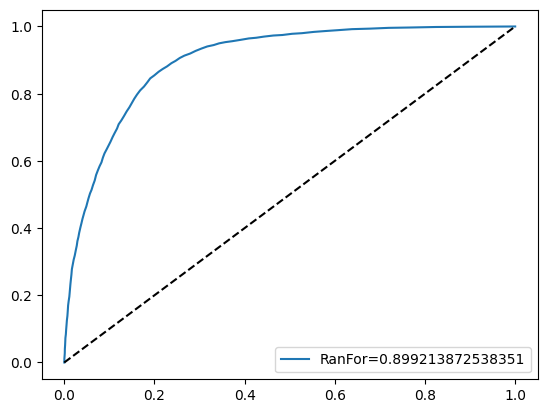

In [98]:
y_pred_proba_rf = rf.predict_proba(X_test_sc)[::,1]

fpr1,tpr1,_ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr1, tpr1, label= "RanFor=" +str(auc1))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train_sc, y_sm)

KNeighborsClassifier(n_neighbors=7)

In [83]:
preds = knn.predict(X_test_sc)

In [84]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80     11378
           1       0.46      0.62      0.53      3905

    accuracy                           0.72     15283
   macro avg       0.66      0.69      0.66     15283
weighted avg       0.75      0.72      0.73     15283



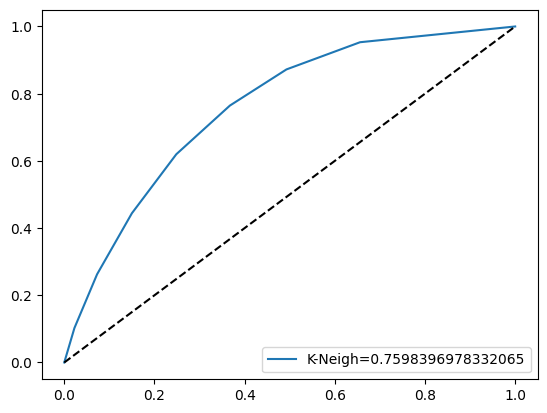

In [97]:
y_pred_proba_knn = knn.predict_proba(X_test_sc)[::,1]

fpr2,tpr2,_ = metrics.roc_curve(y_test, y_pred_proba_knn)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_knn)

plt.plot(fpr2, tpr2, label= "K-Neigh=" +str(auc2))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

## XG boost

In [92]:
xg = XGBClassifier()

In [94]:
xg.fit(X_train_sc, y_sm)

preds = xg.predict(X_test_sc)

In [95]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11378
           1       0.68      0.63      0.65      3905

    accuracy                           0.83     15283
   macro avg       0.78      0.76      0.77     15283
weighted avg       0.83      0.83      0.83     15283



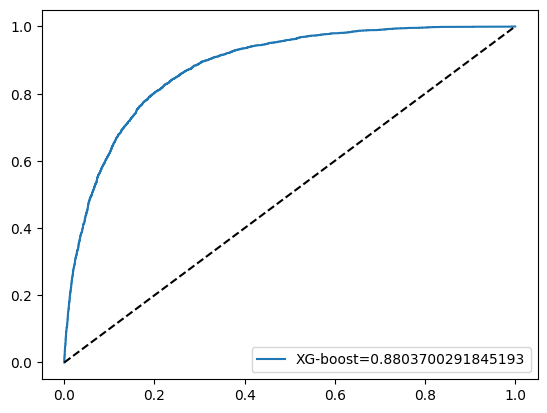

In [96]:
y_pred_proba_xg = xg.predict_proba(X_test_sc)[::,1]

fpr3,tpr3,_ = metrics.roc_curve(y_test, y_pred_proba_xg)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_xg)

plt.plot(fpr3, tpr3, label= "XG-boost=" +str(auc3))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

## Logistic Regression

In [100]:
lg = LogisticRegression()

In [101]:
lg.fit(X_train_sc, y_sm)

preds = lg.predict(X_test_sc)

In [102]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     11378
           1       0.45      0.62      0.52      3905

    accuracy                           0.71     15283
   macro avg       0.65      0.68      0.65     15283
weighted avg       0.75      0.71      0.72     15283



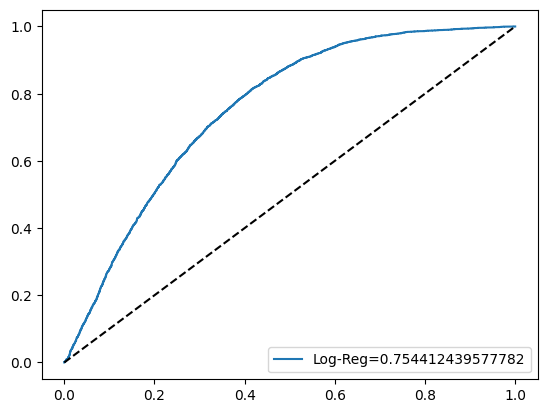

In [104]:
y_pred_proba_lg = lg.predict_proba(X_test_sc)[::,1]

fpr4,tpr4,_ = metrics.roc_curve(y_test, y_pred_proba_lg)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_lg)

plt.plot(fpr4, tpr4, label= "Log-Reg=" +str(auc4))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

In [123]:
import lightgbm as lgb

## LGBM Classifier

In [125]:
light = lgb.LGBMClassifier()

In [126]:
light.fit(X_train_sc, y_sm)

preds = light.predict(X_test_sc)

In [127]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11378
           1       0.66      0.60      0.63      3905

    accuracy                           0.82     15283
   macro avg       0.76      0.75      0.76     15283
weighted avg       0.81      0.82      0.82     15283



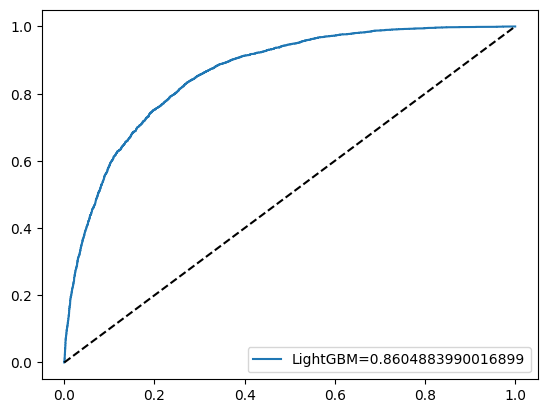

In [128]:
y_pred_proba_light = light.predict_proba(X_test_sc)[::,1]

fpr5,tpr5,_ = metrics.roc_curve(y_test, y_pred_proba_light)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_light)

plt.plot(fpr5, tpr5, label= "LightGBM=" +str(auc5))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

In [129]:
## OLA MAZI

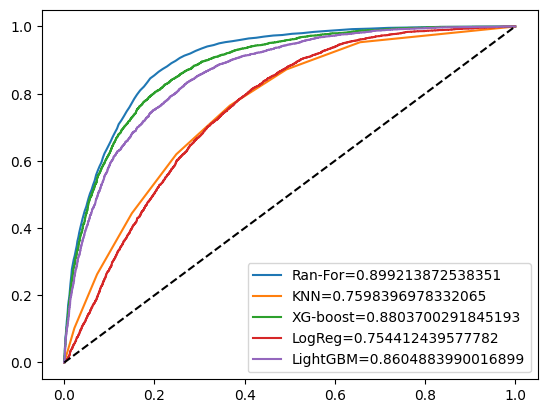

In [131]:
plt.plot(fpr1, tpr1, label = "Ran-For=" +str(auc1))
plt.plot(fpr2, tpr2, label = "KNN=" +str(auc2))
plt.plot(fpr3, tpr3, label = "XG-boost=" +str(auc3))
plt.plot(fpr4, tpr4, label= "LogReg=" +str(auc4))
plt.plot(fpr5, tpr5, label= "LightGBM=" +str(auc5))

plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

In [132]:
df.groupby('')

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,weekend,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,250.566814,3.0,1,1,0,10.0,99.0,1,1.732893,0.212627,118.646831,8.496979,185.096720,4.424871,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,156.604259,3.0,0,0,0,10.0,97.0,1,4.807912,0.228253,80.145015,5.739643,85.727600,2.049380,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,283.056354,5.0,1,0,1,10.0,95.0,2,2.811773,0.244163,101.248112,7.250957,151.364288,3.618473,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,301.755370,4.0,1,0,1,10.0,94.0,2,3.240595,0.610430,92.473938,6.622588,129.863831,3.104489,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,150.760816,2.0,1,0,1,10.0,96.0,1,2.241146,1.119507,124.256767,8.898738,154.348971,3.689824,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50937,327.460609,2.0,1,0,0,9.0,96.0,1,2.608873,0.932342,271.642736,10.488440,537.512628,11.807347,1,0,1,0,0,0,1,0,0,0,0,0,0,0
50938,242.977169,2.0,0,0,0,9.0,80.0,0,1.859134,0.555944,343.045595,13.245387,679.561854,14.927691,1,0,1,0,0,0,1,0,0,0,0,0,0,0
50939,138.943841,2.0,0,0,0,10.0,96.0,2,2.670450,0.968673,266.091811,10.274112,534.080063,11.731945,1,0,1,0,0,0,1,0,0,0,0,0,0,0
50940,185.258454,2.0,0,0,0,2.0,60.0,1,2.266090,0.387429,290.526738,11.217573,627.521382,13.784536,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [133]:
alkis = pd.read_csv(r'alkis.csv')

In [139]:
alkis.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace=True)

In [198]:
alkis

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150,berlin,0
1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900,berlin,0
2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,berlin,0
3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,berlin,0
4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842,berlin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21492,310.449446,Private room,False,True,2.0,False,0,0,10.0,100.0,1,6.347654,0.445862,194.410695,13.513703,446.486289,7.994710,-0.21207,51.48667,london,1
21493,265.057974,Entire home/apt,False,False,4.0,False,1,0,8.0,84.0,1,5.231706,0.463949,254.476513,17.688945,537.720506,9.628334,-0.05459,51.52018,london,1
21494,142.289329,Private room,False,True,2.0,False,0,0,10.0,97.0,1,8.867238,2.675007,125.891017,8.750824,266.789887,4.777096,-0.12056,51.42875,london,1
21495,372.304146,Private room,False,True,2.0,False,0,0,8.0,80.0,1,7.576798,1.682697,146.161215,10.159828,325.152018,5.822118,-0.12810,51.44023,london,1


In [134]:
than = pd.read_csv(r'than.csv')

In [136]:
than.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace=True)

In [137]:
than

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,0
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,0
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,0
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,0
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,327.460609,Private room,False,True,2.0,True,0,0,9.0,96.0,1,2.608873,0.932342,271.642736,10.488440,537.512628,11.807347,2.19672,41.39929,barcelona,1
10189,242.977169,Private room,False,True,2.0,False,0,0,9.0,80.0,0,1.859134,0.555944,343.045595,13.245387,679.561854,14.927691,2.19099,41.39269,barcelona,1
10190,138.943841,Private room,False,True,2.0,False,0,0,10.0,96.0,2,2.670450,0.968673,266.091811,10.274112,534.080063,11.731945,2.19738,41.39954,barcelona,1
10191,185.258454,Private room,False,True,2.0,False,0,0,2.0,60.0,1,2.266090,0.387429,290.526738,11.217573,627.521382,13.784536,2.19679,41.39029,barcelona,1


In [ ]:
# df8 = pd.read_csv('london_weekdays.csv')

# df8['city'] = 'london'

# df8['weekend'] = 1

# df8.head(2)

In [148]:
lisbon = pd.read_csv('lisbon_weekdays.csv')

In [149]:
lisbon['city'] = 'lisbon'

In [150]:
lisbon['weekend'] = 0

In [151]:
lisbon.head(3)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
0,0,138.133208,Private room,False,True,2.0,True,1,0,10.0,98.0,1,4.328029,0.298484,74.230170,2.450656,176.868292,7.910210,-9.14034,38.75137,lisbon,0
1,1,124.061914,Private room,False,True,2.0,True,1,0,10.0,97.0,1,4.465504,0.293603,72.570845,2.395875,173.909352,7.777875,-9.14092,38.75260,lisbon,0
2,2,194.183865,Private room,False,True,4.0,True,1,0,10.0,87.0,2,4.475232,0.167860,72.517895,2.394127,177.996137,7.960651,-9.14245,38.75264,lisbon,0


In [152]:
lisbon2 = pd.read_csv('lisbon_weekends.csv')

In [153]:
lisbon2['city'] = 'lisbon'

In [154]:
lisbon2['weekend'] = 1

In [155]:
lisbon2.head(3)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
0,0,137.664165,Private room,False,True,2.0,True,1,0,10.0,98.0,1,4.328041,0.298493,74.230019,2.448349,176.867933,9.940446,-9.14034,38.75137,lisbon,1
1,1,123.827392,Private room,False,True,2.0,True,1,0,10.0,97.0,1,4.465486,0.293602,72.571059,2.393631,173.909831,9.774192,-9.14092,38.75260,lisbon,1
2,2,193.011257,Private room,False,True,4.0,True,1,0,10.0,87.0,2,4.475239,0.167851,72.517817,2.391875,177.996433,10.003870,-9.14245,38.75264,lisbon,1


In [156]:
paris = pd.read_csv('paris_weekends.csv')

paris['city'] = 'paris'

paris['weekend'] = 1

In [157]:
paris2 = pd.read_csv('paris_weekdays.csv')

paris2['city'] = 'paris'

paris2['weekend'] = 0

In [158]:
rome = pd.read_csv('rome_weekends.csv')

rome['city'] = 'rome'

rome['weekend'] = 1

In [159]:
rome2 = pd.read_csv('rome_weekdays.csv')

rome2['city'] = 'rome'

rome2['weekend'] = 0

In [160]:

vienna = pd.read_csv('vienna_weekends.csv')

vienna['city'] = 'vienna'

vienna['weekend'] = 1

In [161]:

vienna2 = pd.read_csv('vienna_weekdays.csv')

vienna2['city'] = 'vienna'

vienna2['weekend'] = 0

In [162]:
alex = pd.concat([lisbon, lisbon2, paris, paris2, rome, rome2, vienna, vienna2])

In [165]:
alex.drop(['Unnamed: 0'], axis=1, inplace=True)

In [166]:
bnb = pd.concat([alkis, alex, than])

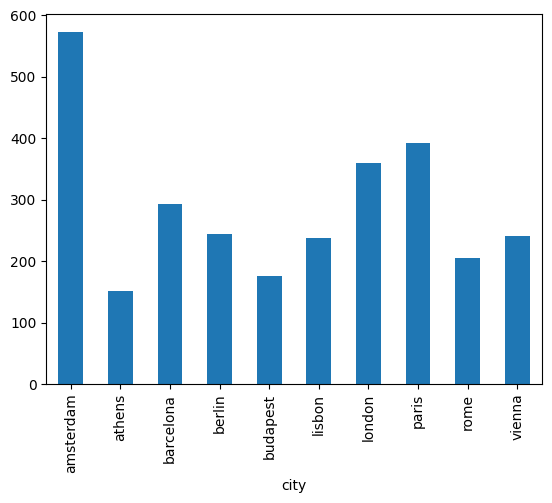

In [180]:
bnb.groupby('city').mean()['realSum'].plot.bar()
None

In [182]:
import seaborn as sns

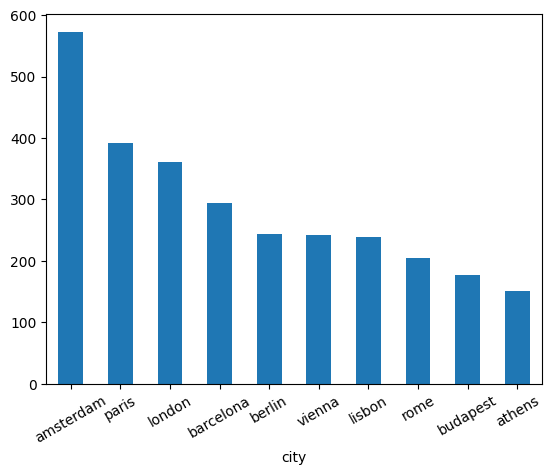

In [299]:
bnb.groupby('city').mean().sort_values('realSum', ascending=False)['realSum'].plot.bar(rot=30)
None

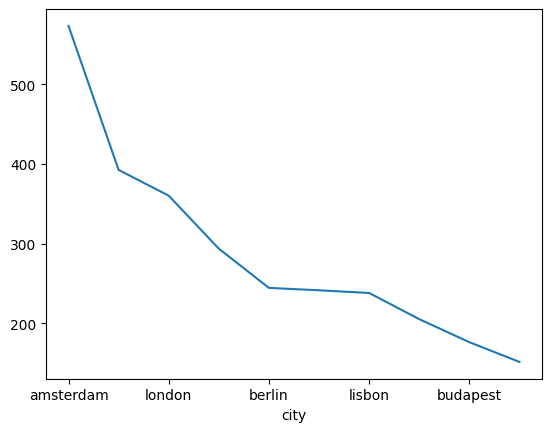

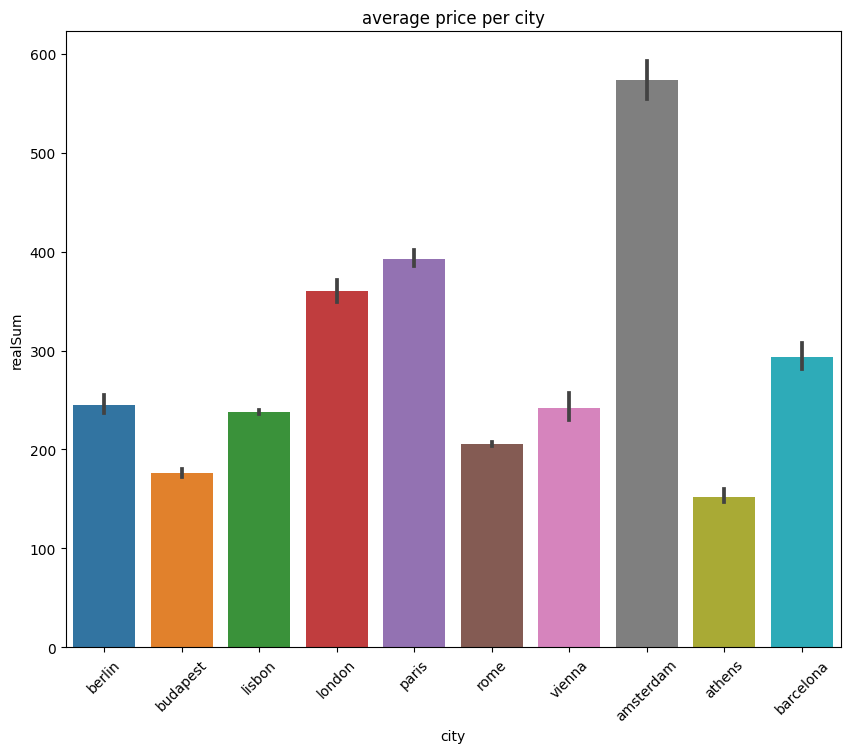

In [288]:

plt.figure(figsize=(10,8))
sns.barplot(x="city", y="realSum", data=bnb).set_title('average price per city')
plt.xticks(rotation=45)

plt.show()


# result = bnb.groupby('city').mean().sort_values('realSum',ascending=False)
# sns.barplot(x='city', y="realSum", data=bnb, order=result['realSum'])
# plt.show()

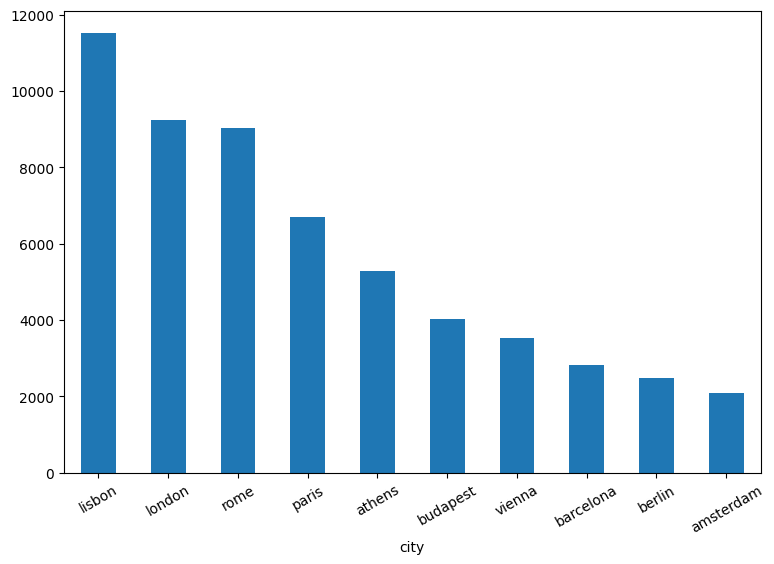

In [268]:
bnb.groupby('city').count().sort_values('host_is_superhost', ascending=False)['host_is_superhost'].plot.bar(figsize=(9,6), rot=30)
None

In [306]:
bnb.groupby(['city','host_is_superhost']).count()

realSum  room_type  room_shared  room_private  \
city      host_is_superhost                                                  
amsterdam False                 1489       1489         1489          1489   
          True                   591        591          591           591   
athens    False                 3017       3017         3017          3017   
          True                  2263       2263         2263          2263   
barcelona False                 2319       2319         2319          2319   
          True                   514        514          514           514   
berlin    False                 1845       1845         1845          1845   
          True                   639        639          639           639   
budapest  False                 2498       2498         2498          2498   
          True                  1524       1524         1524          1524   
lisbon    False                 9060       9060         9060          9060   
          True                  2466       2466         2466          2466   
london    False                 7872       7872         7872          7872   
          True                  1356       1356         1356          1356   
paris     False                 5747       5747         5747          5747   
          True                   941        941          941           941   
rome      False                 6078       6078         6078          6078   
          True                  2949       2949         2949          2949   
vienna    False                 2532       2532         2532          2532   
          True                  1005       1005         1005          1005   

                             person_capacity  multi   biz  cleanliness_rating  \
city      host_is_superhost                                                     
amsterdam False                         1489   1489  1489                1489   
          True                           591    591   591                 591   
athens    False                         3017   3017  3017                3017   
          True                          2263   2263  2263                2263   
barcelona False                         2319   2319  2319                2319   
          True                           514    514   514                 514   
berlin    False                         1845   1845  1845                1845   
          True                           639    639   639                 639   
budapest  False                         2498   2498  2498                2498   
          True                          1524   1524  1524                1524   
lisbon    False                         9060   9060  9060                9060   
          True                          2466   2466  2466                2466   
london    False                         7872   7872  7872                7872   
          True                          1356   1356  1356                1356   
paris     False                         5747   5747  5747                5747   
          True                           941    941   941                 941   
rome      False                         6078   6078  6078                6078   
          True                          2949   2949  2949                2949   
vienna    False                         2532   2532  2532                2532   
          True                          1005   1005  1005                1005   

                             guest_satisfaction_overall  bedrooms  dist  \
city      host_is_superhost                                               
amsterdam False                                    1489      1489  1489   
          True                                      591       591   591   
athens    False                                    3017      3017  3017   
          True                                     2263      2263  2263   
barcelona False                                    2319      2319  2319   
    

In [311]:
s= bnb.groupby(['city','host_is_superhost']).count().reset_index()

In [331]:
s=s.set_index('city')

KeyError: "None of ['city'] are in the columns"

In [345]:
s

,host_is_superhost,realSum,room_type,room_shared,room_private,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekend
city,,,,,,,,,,,,,,,,,,,,
amsterdam,False,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
amsterdam,True,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591
athens,False,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017
athens,True,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263,2263
barcelona,False,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319
barcelona,True,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514
berlin,False,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845
berlin,True,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
budapest,False,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498,2498


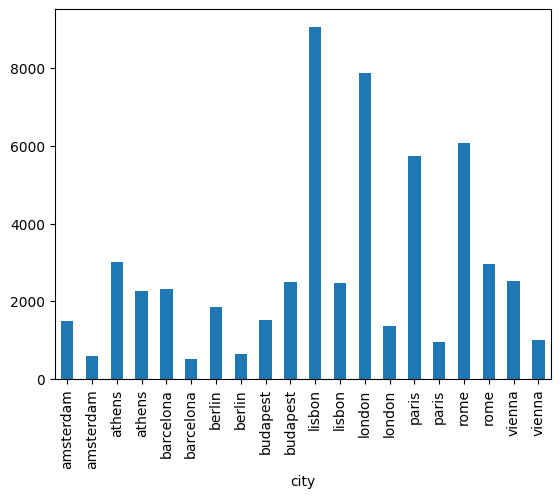

In [329]:
s.sort_values('city')['realSum'].plot.bar()
None

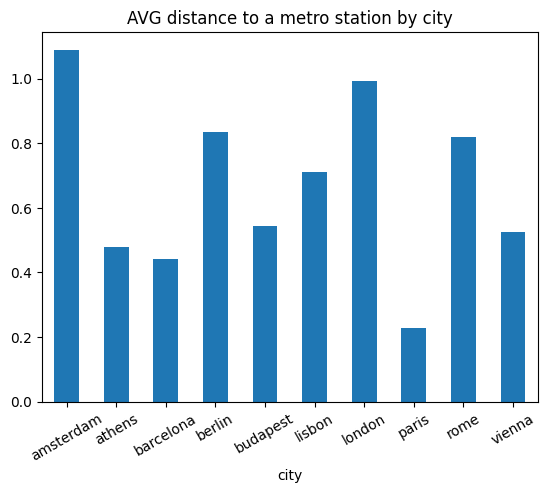

In [254]:
bnb.groupby('city').mean()['metro_dist'].plot.bar(rot=30)
plt.title("AVG distance to a metro station by city")
None

In [261]:
bnb.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'weekend'],
      dtype='object')